## Maxent for matrix-valued Green's functions

In this notebook we benchmark the "poorman" method for MaxEnt continuation of 
matrix-valued Green's functions. To this end we consider a Green's function that is a 
2x2 matrix. First we define a diagonal matrix for the spectral function, then we rotate it
to get also off-diagonal elements, and transform it to the imaginary axis.
Then we do an analytical continuation for this matrix-valued Green's function.
In the very end we compare the determinants of the
spectral matrices.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

sys.path.insert(0, '/home/josef/Programs/ana_cont')
from ana_cont import continuation as cont

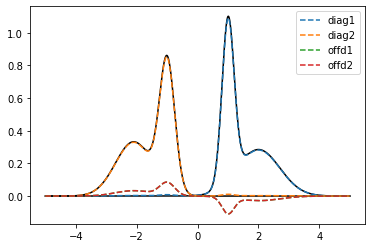

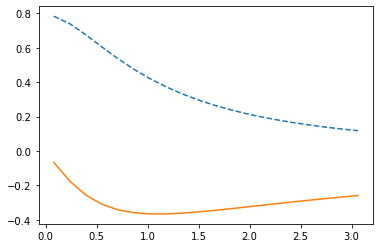

In [2]:
true_w = np.linspace(-5.,5.,num=5001, endpoint=True)
beta = 40.
niw = 20
wn = np.pi/beta * (2.*np.arange(niw) + 1.)
def gauss_peak(center, width):
    return np.exp(-(true_w-center)**2/(2.*width**2)) / (width*np.sqrt(2.*np.pi))
true_spec_1 = 0.5*(gauss_peak(1., 0.2) + gauss_peak(2.,0.7))
true_spec_2 = 0.5*(gauss_peak(-1., 0.25) + gauss_peak(-2.1, 0.6))

spec_matrix = np.zeros((2,2,true_w.shape[0]))
spec_matrix[0,0] = true_spec_1
spec_matrix[1,1] = true_spec_2

rot_ang = 0.1
rot_mat = np.array([[np.cos(rot_ang), np.sin(rot_ang)],[-np.sin(rot_ang), np.cos(rot_ang)]])

true_spec_rot = np.einsum('ij,jkw,kl', rot_mat, spec_matrix, rot_mat.transpose())

plt.plot(true_w, true_spec_1, color='black')
plt.plot(true_w, true_spec_2, color='black')
plt.plot(true_w, true_spec_rot[0,0], label='diag1', ls='--')
plt.plot(true_w, true_spec_rot[1,1], label='diag2', ls='--')
plt.plot(true_w, true_spec_rot[0,1], label='offd1', ls='--')
plt.plot(true_w, true_spec_rot[1,0], label='offd2', ls='--')
plt.legend()
plt.show()


kernel = 1./(1j*wn[:,None] - true_w[None,:])
giw = np.trapz(kernel[None,None,:,:]*true_spec_rot[:,:,None,:], true_w, axis=3)
plt.plot(wn, giw[1,1].real, ls='--')
plt.plot(wn, giw[1,1].imag)
plt.show()

In [3]:
wgrid = np.linspace(-4, 4, num=400)
#model = np.ones_like(wgrid)
#model = np.exp(-(wgrid-0.9)**2) * (wgrid-0.9)**2
model_diag = np.exp(-0.5*wgrid**2)
model_diag /= np.trapz(model_diag, wgrid)
errfac = 0.00001
err = errfac * np.ones_like(wn)
#perfect_model = np.abs(np.interp(wgrid, true_w, true_spec))

In [4]:
probl_00 = cont.AnalyticContinuationProblem(im_axis=wn, re_axis=wgrid, 
                                            im_data=giw[0,0], kernel_mode='freq_fermionic')
probl_11 = cont.AnalyticContinuationProblem(im_axis=wn, re_axis=wgrid, 
                                            im_data=giw[1,1], kernel_mode='freq_fermionic')
probl_01 = cont.AnalyticContinuationProblem(im_axis=wn, re_axis=wgrid, 
                                            im_data=giw[0,1], kernel_mode='freq_fermionic')

400 data points on real axis
40 data points on imaginary axis
31 significant singular values
Precomputation of coefficient matrices...
log10(alpha) = 18.00,	chi2 = 6.684e+10,   S = -3.486e-15,   nfev = 1,   norm = 1.000
log10(alpha) = 17.00,	chi2 = 6.684e+10,   S = -3.484e-13,   nfev = 1,   norm = 1.000
log10(alpha) = 16.00,	chi2 = 6.684e+10,   S = -3.484e-11,   nfev = 1,   norm = 1.000
log10(alpha) = 15.00,	chi2 = 6.683e+10,   S = -3.483e-09,   nfev = 3,   norm = 1.000
log10(alpha) = 14.00,	chi2 = 6.670e+10,   S = -3.471e-07,   nfev = 10,   norm = 1.000
log10(alpha) = 13.00,	chi2 = 6.548e+10,   S = -3.364e-05,   nfev = 13,   norm = 0.995
log10(alpha) = 12.00,	chi2 = 5.578e+10,   S = -2.554e-03,   nfev = 16,   norm = 0.962
log10(alpha) = 11.00,	chi2 = 2.542e+10,   S = -6.564e-02,   nfev = 24,   norm = 0.846
log10(alpha) = 10.00,	chi2 = 4.428e+09,   S = -3.971e-01,   nfev = 26,   norm = 0.820
log10(alpha) = 9.00,	chi2 = 2.413e+08,   S = -9.238e-01,   nfev = 41,   norm = 0.923
log10(alph

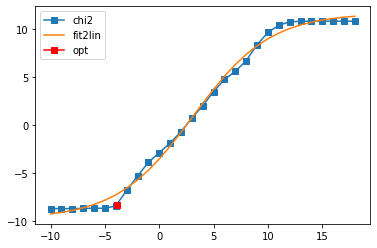

400 data points on real axis
40 data points on imaginary axis
31 significant singular values
Precomputation of coefficient matrices...
log10(alpha) = 18.00,	chi2 = 6.693e+10,   S = -3.517e-15,   nfev = 1,   norm = 1.000
log10(alpha) = 17.00,	chi2 = 6.693e+10,   S = -3.522e-13,   nfev = 1,   norm = 1.000
log10(alpha) = 16.00,	chi2 = 6.693e+10,   S = -3.522e-11,   nfev = 1,   norm = 1.000
log10(alpha) = 15.00,	chi2 = 6.692e+10,   S = -3.521e-09,   nfev = 3,   norm = 1.000
log10(alpha) = 14.00,	chi2 = 6.679e+10,   S = -3.510e-07,   nfev = 10,   norm = 1.000
log10(alpha) = 13.00,	chi2 = 6.556e+10,   S = -3.400e-05,   nfev = 13,   norm = 0.995
log10(alpha) = 12.00,	chi2 = 5.577e+10,   S = -2.577e-03,   nfev = 16,   norm = 0.961
log10(alpha) = 11.00,	chi2 = 2.534e+10,   S = -6.570e-02,   nfev = 25,   norm = 0.840
log10(alpha) = 10.00,	chi2 = 4.478e+09,   S = -3.949e-01,   nfev = 25,   norm = 0.807
log10(alpha) = 9.00,	chi2 = 2.575e+08,   S = -9.298e-01,   nfev = 50,   norm = 0.909
log10(alph

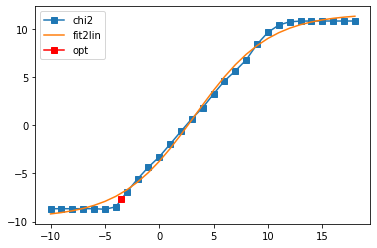

In [5]:
sol_00,sol_all_00 = probl_00.solve(method='maxent_svd', alpha_determination='chi2kink', 
                                   optimizer='newton', stdev=err, model=model_diag, 
                                   alpha_start=1e18, alpha_end=1e-10, fit_position=2.,
                                   offdiag=False, interactive=True)
sol_11,sol_all_11 = probl_11.solve(method='maxent_svd', alpha_determination='chi2kink', 
                                   optimizer='newton', stdev=err, model=model_diag, 
                                   alpha_start=1e18, alpha_end=1e-10, fit_position=2.,
                                   offdiag=False, interactive=True)

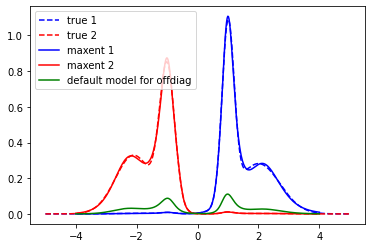

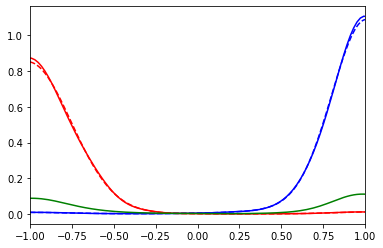

In [6]:
model_offd = np.sqrt(sol_00.A_opt * sol_11.A_opt)
plt.plot(true_w, true_spec_rot[0,0], color='blue', ls='--', label='true 1')
plt.plot(true_w, true_spec_rot[1,1], color='red', ls='--', label='true 2')
plt.plot(wgrid, sol_00.A_opt, color='blue', label='maxent 1')
plt.plot(wgrid, sol_11.A_opt, color='red', label='maxent 2')
plt.plot(wgrid, model_offd, color='green', label='default model for offdiag')
plt.legend()
plt.show()

plt.plot(true_w, true_spec_rot[0,0], color='blue', ls='--')
plt.plot(true_w, true_spec_rot[1,1], color='red', ls='--')
plt.plot(wgrid, sol_00.A_opt, color='blue')
plt.plot(wgrid, sol_11.A_opt, color='red')
plt.plot(wgrid, model_offd, color='green')
plt.xlim(-1,1)
plt.show()

400 data points on real axis
40 data points on imaginary axis
31 significant singular values
Precomputation of coefficient matrices...
log10(alpha) = 15.00,	chi2 = 1.400e+09,   S = -1.084e-11,   nfev = 1,   norm = -0.000
log10(alpha) = 14.00,	chi2 = 1.400e+09,   S = -1.083e-09,   nfev = 7,   norm = -0.000
log10(alpha) = 13.00,	chi2 = 1.396e+09,   S = -1.080e-07,   nfev = 11,   norm = -0.000
log10(alpha) = 12.00,	chi2 = 1.358e+09,   S = -1.051e-05,   nfev = 14,   norm = -0.000
log10(alpha) = 11.00,	chi2 = 1.050e+09,   S = -8.125e-04,   nfev = 17,   norm = -0.000
log10(alpha) = 10.00,	chi2 = 2.152e+08,   S = -1.669e-02,   nfev = 27,   norm = -0.001
log10(alpha) = 9.00,	chi2 = 6.829e+06,   S = -3.987e-02,   nfev = 31,   norm = -0.001
log10(alpha) = 8.00,	chi2 = 1.440e+05,   S = -4.670e-02,   nfev = 28,   norm = 0.000
log10(alpha) = 7.00,	chi2 = 2.595e+03,   S = -4.806e-02,   nfev = 24,   norm = 0.000
log10(alpha) = 6.00,	chi2 = 7.595e+01,   S = -4.832e-02,   nfev = 18,   norm = -0.000
log

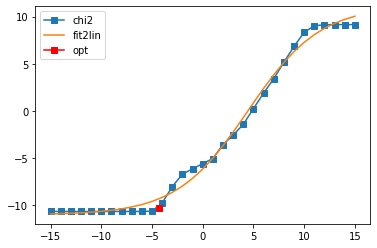

In [7]:
sol_01, sol_all_01 = probl_01.solve(method='maxent_svd', alpha_determination='chi2kink', optimizer='newton',
                                    stdev=err, model=model_offd, offdiag=True, 
                                    preblur=False, blur_width=0.05, # preblur not necessary
                                    alpha_start=1e15, alpha_end=1e-15,
                                    interactive=True)

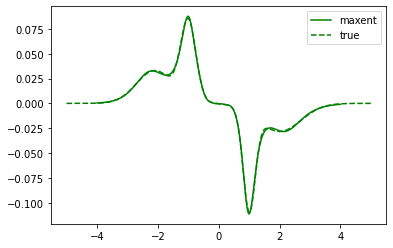

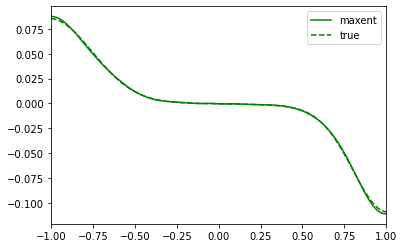

In [8]:
plt.plot(wgrid, sol_01.A_opt, color='green', label='maxent')
plt.plot(true_w, true_spec_rot[0,1], color='green', ls='--', label='true')
plt.legend()
plt.show()

plt.plot(wgrid, sol_01.A_opt, color='green', label='maxent')
plt.plot(true_w, true_spec_rot[0,1], color='green', ls='--', label='true')
plt.xlim(-1,1)
plt.legend()
plt.show()

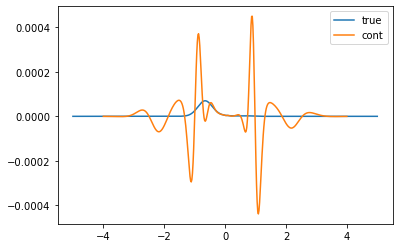

In [9]:
spec_rot = np.zeros((2,2,sol_00.A_opt.shape[0]))
spec_rot[0,0] = sol_00.A_opt
spec_rot[1,1] = sol_11.A_opt
spec_rot[0,1] = sol_01.A_opt
spec_rot[1,0] = sol_01.A_opt # 10 and 01 are identical

true_det = true_spec_1 * true_spec_2
true_det = np.linalg.det(true_spec_rot.transpose((2,0,1)))
det = np.linalg.det(spec_rot.transpose((2,0,1)))

plt.plot(true_w, true_det, label='true')
plt.plot(wgrid, det, label='cont')
plt.legend()
plt.show()

Conclusion: The poorman method actually works impressively well.